## Final Project ##

Firstly we load the data

In [2]:
"""
/usr/local/bin/python3.10 -m pip install pandas scikit-learn keras matplotlib sentence-transformers

"""
%matplotlib inline





pip install datasets

In [3]:
import pandas as pd


# Replace "Saba06huggingface/resume_dataset" 
resumes = pd.read_csv("data/resume.csv")

# splits = {'train': 'train_dataset.json', 'validation': 'val_dataset.json', 'test': 'test_dataset.json'}
# df = pd.read_json("hf://datasets/Saba06huggingface/resume_dataset/" + splits["train"], lines=True)

print(resumes.columns)

# job descirption data set form data folder
job_descriptions = pd.read_csv("data/jb_df.csv")

print(job_descriptions.columns)




Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
Index(['Job Title', 'Role', 'Job Description'], dtype='object')


**Exploring the data**

In [4]:
print(resumes.head())
print()
print(job_descriptions.head())

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

                  Job Title                          Role  \
0       Procurement Manager    Supplier Diversity Manager   
1    Architectural Designer         Architectural Drafter   
2               Art Teacher     Art

In [5]:
print(resumes.isnull().sum())
print()
print(job_descriptions.isnull().sum())

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

Job Title          0
Role               0
Job Description    0
dtype: int64


In [6]:
print(resumes.shape)
print(resumes.info())
print()
print(job_descriptions.shape)
print(job_descriptions.info())

(2484, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None

(200000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Job Title        200000 non-null  object
 1   Role             200000 non-null  object
 2   Job Description  200000 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB
None


In [7]:
print(resumes['Category'].value_counts())
print()
# print the total number of resumes
print("total number of resumes:", resumes['Category'].value_counts().sum())

#Print number of unique categories 
print("total number of categories:", resumes['Category'].nunique())

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

total number of resumes: 2484
total number of categories: 24


In [8]:
resumes['resume_length'] = resumes['Resume_str'].apply(lambda x: len(x.split()))
job_descriptions['job_desc_length'] = job_descriptions['Job Description'].apply(lambda x: len(x.split()))

print(resumes['resume_length'].describe())
print(job_descriptions['job_desc_length'].describe())



count    2484.000000
mean      811.325684
std       371.006906
min         0.000000
25%       651.000000
50%       757.000000
75%       933.000000
max      5190.000000
Name: resume_length, dtype: float64
count    200000.000000
mean         24.195915
std           7.473316
min          10.000000
25%          19.000000
50%          24.000000
75%          28.000000
max          62.000000
Name: job_desc_length, dtype: float64


In [9]:
import plotly.express as px

# Calculate the frequency of each category
category_counts = resumes['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create the interactive pie chart
fig = px.pie(
    category_counts,
    names='Category',
    values='Count',
    title='Distribution of Resume Categories',
    hole=0.3,  # Optional: To create a donut chart, use a value between 0 and 1
    color_discrete_sequence=px.colors.sequential.Blues  # Optional: Change color palette
)

# Customize the layout
fig.update_traces(textinfo='percent+label')  # Display percentage and category name on the chart
fig.update_layout(template='plotly_white')

# Show the interactive plot
fig.show()


Second Visualization: **Word Cloud**

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word frequency visualization for the IT category
# words taken from the dictionary created further below
category_words = ["Python", "Java", "C++", "JavaScript", "HTML", "CSS", "SQL", "NoSQL", "React", "Angular",
        "Django", "Flask", "Git", "AWS", "Azure", "Google Cloud Platform", "DevOps", "Docker",
        "Kubernetes", "Linux", "Windows Server", "Machine Learning", "Data Science", "TensorFlow",
        "Keras", "Cybersecurity", "Penetration Testing", "Scrum", "Agile", "REST APIs",
        "Microservices", "Networking", "Cloud Computing", "Virtualization", "Data Analysis"]
word_counts = Counter(category_words)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word frequency visualization for the Chef category
category_words = ["Menu Planning", "Food Preparation", "Culinary Techniques", "Recipe Development",
        "Inventory Management", "Food Safety", "Sanitation Standards", "Pastry Skills",
        "Grill Station", "Sous Vide Cooking", "Knife Skills", "Garnishing", "Plating",
        "Baking", "Kitchen Operations", "Staff Management", "Cost Control",
        "Menu Costing", "Customer Service", "Catering"]

word_counts2 = Counter(category_words)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word frequency visualization for the Agriculture category
category_words = ["Crop Management", "Farm Equipment", "Horticulture", "Soil Testing", "Irrigation Systems",
        "Pest Control", "Agronomy", "Livestock Management", "Sustainable Farming", "Organic Certification",
        "Farm Operations", "Yield Optimization", "Composting", "Agricultural Policy", "Crop Rotation"]

word_counts3 = Counter(category_words)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts3)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


NameError: name 'plt' is not defined

Third Visualization: **Resume Length Distribution**

In [5]:
import plotly.express as px
import pandas as pd

# Example: Generate 'resumes' DataFrame (use your actual data)
# resumes = pd.DataFrame({'Resume_str': [...]})

# Calculate resume lengths
resumes['resume_length'] = resumes['Resume_str'].apply(lambda x: len(x.split()))

# Create the interactive histogram using Plotly
fig = px.histogram(
    resumes,
    x='resume_length',
    nbins=30,
    title='Distribution of Resume Lengths',
    labels={'resume_length': 'Resume Length'},
    color_discrete_sequence=['skyblue']
)

# Customize the layout
fig.update_layout(
    xaxis_title='Resume Length',
    yaxis_title='Frequency',
    bargap=0.2,
    template='plotly_white'
)

# Show the interactive plot
fig.show()



In [4]:
import plotly.express as px
import pandas as pd

# Calculate average resume lengths by category
resumes['resume_length'] = resumes['Resume_str'].apply(lambda x: len(x.split()))
average_lengths = resumes.groupby('Category')['resume_length'].mean().sort_values()

# Create a DataFrame for plotting
average_lengths_df = average_lengths.reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(
    average_lengths_df,
    x='Category',
    y='resume_length',
    title='Average Resume Length by Category',
    labels={'resume_length': 'Average Resume Length', 'Category': 'Resume Category'},
    color='resume_length',
    hover_data={'resume_length': ':.2f'},  # Show hover details with 2 decimal precision
)

# Customize the layout
fig.update_layout(
    xaxis_title='Resume Category',
    yaxis_title='Average Resume Length',
    xaxis_tickangle=45
)

# Show the interactive plot
fig.show()


In [27]:
#  print resume_str for the first resume
print(resumes['Resume_str'][0])

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

In [13]:
# drop html column from resume
resumes.drop('Resume_html', axis=1, inplace=True)

In [14]:
#This shows the structure of the resume format currently which includes an ID, Resume_str, and a Category 
print(resumes.columns)

Index(['ID', 'Resume_str', 'Category', 'resume_length'], dtype='object')


In [15]:
#This shows what the values of the job_description looks like 

print(job_descriptions['Job Description'][0])
print(job_descriptions['Role'][0])
print(job_descriptions['Job Title'][0])


Promote diversity and inclusion in the supply chain, manage supplier diversity programs, and assess supplier performance.
Supplier Diversity Manager
Procurement Manager



This section uses the Sentence Transformer with the all-MiniLM model to map text into high-dimensional vectors (essentially numerical matrices). 
These vectors allow us to compare different pieces of text in a mathematical way. 
For example, sentences like 'It's a sunny day' and 'It's a warm day and the sun is out' will have similar vectors because they mean similar things.

Continuing with resume dataset from here onwards

In [16]:
# pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer


# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example: Encode a single resume and a job description
resume_text = resumes['Resume_str'][0]  # Take the first resume as an example
job_description_text = job_descriptions['Job Description'][0]  # Take the first job description as an example

# Encode the texts
resume_embedding = model.encode(resume_text)
job_description_embedding = model.encode(job_description_text)

print("Resume Embedding:", resume_embedding)
print("Job Description Embedding:", job_description_embedding)

/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


Resume Embedding: [-4.44783904e-02  2.12291833e-02  5.16215991e-03  8.68071616e-02
 -1.90761555e-02  7.81325973e-04  2.37274785e-02 -4.06728014e-02
 -1.07696280e-01 -4.17434908e-02  2.73197796e-02 -3.32663618e-02
  5.37253506e-02  3.51294968e-03  3.34979743e-02 -6.90997858e-03
  5.97889759e-02  4.97065485e-03  2.38165036e-02 -8.98992196e-02
 -2.34016199e-02 -3.63231637e-02 -6.50669187e-02  5.72315929e-03
 -8.66769552e-02 -2.19411347e-02 -1.34049580e-02  6.51615933e-02
 -6.56526759e-02 -4.83934879e-02 -1.35339489e-02 -3.70528623e-02
  8.72620642e-02 -2.55778302e-02  4.85715419e-02  1.14448287e-01
  3.60472761e-02 -2.03129128e-02  3.95207629e-02 -3.87397036e-02
 -4.27797586e-02 -4.83792424e-02 -2.18280703e-02 -5.85983358e-02
  1.58919841e-02 -2.26589367e-02 -7.07800733e-03 -2.54447684e-02
 -8.44771415e-02  3.12941521e-02 -5.66065721e-02 -7.04541220e-04
  4.22375724e-02  3.30649428e-02 -4.74978499e-02  4.66278531e-02
  2.50048619e-02  2.18113009e-02 -1.04683869e-01 -3.39016020e-02
 -1.305

In [17]:
#This indicates the size of the resume_embedding matrix (384,)
#In other words its basically a matrix of with row 384 with no columns 
print(resume_embedding.shape)

(384,)


We analyzed two resumes:

1. **First resume**: Classified as "HR."
2. **Second resume**: Classified as "Designer."

These two categories are clearly quite different. To verify this, we used **cosine similarity** to compare the text from the resumes after transforming them into matrices using the SentenceTransformer model.

The cosine similarity score came out to **0.37979**, which confirms that the two resumes are quite dissimilar. This result aligns with our expectation that HR and Designer resumes should differ significantly.

This demonstrates that the SentenceTransformer model effectively captures the differences between resume texts.


In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example: Encode the first resume and its category
hr_resume_text = resumes['Resume_str'][0]  
designer_resume_text = resumes['Resume_str'][110]  


# Encode the texts using SBERT
hr_embedding = model.encode(hr_resume_text)
designer_embedding = model.encode(designer_resume_text)

# Calculate the cosine similarity between the resume and category
similarity_score = cosine_similarity([hr_embedding], [designer_embedding])[0][0]

#print("Resume:", resume_text)
#print("Category:", category_text)
print("Similarity Score:", similarity_score)


Similarity Score: 0.37977874


These two resumes were both classified under the HR category. To verify their similarity, we again calculated the cosine similarity score between the resumes using their SentenceTransformer embeddings.

Cosine similarity score: **0.84231**

A higher score (closer to 1) indicates strong similarity between the two resumes in terms of semantic content. This result aligns with the expectation that resumes from the same category, such as HR, will have similar textual structures and content.
This demonstrates the SentenceTransformer model’s effectiveness in grouping semantically similar texts.

In [19]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example: Encode the first resume and its category
hr_resume_text = resumes['Resume_str'][0]  
hr_2_resume_text = resumes['Resume_str'][1]  

hr_embedding = model.encode(resume_text)
hr_2_embedding = model.encode(hr_2_resume_text)

# Calculate the cosine similarity between the resume and category
similarity_score = cosine_similarity([hr_embedding], [hr_2_embedding])[0][0]

#print("Resume:", resume_text)
#print("Category:", category_text)
print("Similarity Score:", similarity_score)


Similarity Score: 0.6777137


The code below uses TF-IDF to represent resumes as word frequency matrices and calculates cosine similarity to compare resumes within and across categories.

In [25]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf comparison between two resume str with the same category
# both of the following resumes have the same category HR
resume_one_hr = resumes['Resume_str'][0]
resume_two_hr = resumes['Resume_str'][1]
# resume with category DESIGNER
resume_designer = resumes['Resume_str'][110]
resume_aviation = resumes['Resume_str'][2367]
resume_fitness = resumes['Resume_str'][792]

# print categories for the aboce
print(resumes['Category'][0])
print(resumes['Category'][1])
print(resumes['Category'][110])
print(resumes['Category'][2367])
print(resumes['Category'][792])

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# tfidf on the resumes (This will generate a row/column matrix) (Each new row repersents a new resume, the column repersents the diffrent words)
resume_tfidf = tfidf.fit_transform([resume_one_hr, resume_two_hr])

# Calculate the cosine similarity between the two resumes ()
similarity_score = cosine_similarity(resume_tfidf)

# tfidf on the resumes
resume_different_cat_tfidf = tfidf.fit_transform([resume_one_hr, resume_designer])

# Calculate the cosine similarity between the two resumes
similarity_score_different_cat = cosine_similarity(resume_different_cat_tfidf)

# tfidf on the resumes
fitness_aviation = tfidf.fit_transform([resume_aviation, resume_fitness])

# Calculate the cosine similarity between the two resumes
similarity_score_fitavi = cosine_similarity(fitness_aviation)

# print

print("Similarity Score between similar ones:", similarity_score[0][1])
print("Similarity Score between different ones:", similarity_score_different_cat[0][1])
print("Similarity Score between fitness and aviation:", similarity_score_fitavi[0][1])

HR
HR
DESIGNER
AVIATION
FITNESS
Similarity Score between similar ones: 0.6840227888027683
Similarity Score between different ones: 0.5616106197252699
Similarity Score between fitness and aviation: 0.5047879386181318


**SenteceTransformer vs TF-IDF**

As seen above, we tested both TF-IDF and SentenceTransformer and even though the similarity score when both resumes are 'HR' is higher in TFIDF (0.684 vs 0.677), higher similarity scores in TF-IDF can sometimes arise from keyword overlaps, which may not translate to better model performance. Since the two resumes share many common words, TF-IDF gives a high score even if the resumes differ significantly in meaning.
SentenceTransformer embeddings generalize better because they look beyond word overlap, considering context and meaning, which is particularly useful for resumes written with varying language styles. SentenceTransformer produces dense embeddings (fixed size of 384 dimensions) that preserve semantic relationships between words, making it robust for downstream tasks while TF-IDF generates sparse matrices that grow with the vocabulary size, and can be inefficient and prone to overfitting in high-dimensional datasets.

Moreover, TF-IDF can unintentionally leak information from the dataset. This happens when the vocabulary is built across the entire dataset, causing some terms to be unfairly weighted during feature extraction. This could lead to artificially inflated performance in training but poor generalization in real-world scenarios, which we saw in our first drafts of this code. 

Also, SentenceTransformer embeddings are computationally efficient and well-suited for high-dimensional data, whereas TF-IDF's performance declines as the dataset size increases.

Therefore, all in all, SentenceTransformer is better suited for this project due to its ability to handle semantic relationships, prevent data leakage, and provide computational efficiency.

So what other features can we engineer? To increase the accuracy of the model we focused on feature engineering techniques that align with the semantic nature of our dataset:

**Resume Length**: Added a numerical feature capturing the character count of each resume to account for verbosity as a potential differentiator between categories.

**SentenceTransformer Embeddings**: Generated 384-dimensional embeddings to capture the semantic structure of each resume.

**Category-Specific Keyword Counts**: Created a 24-dimensional feature vector representing the frequency of predefined keywords for each job category. This helps link resumes to their respective industries based on keyword presence.

These features enhance the dataset by combining basic metadata, semantic meaning, and category-specific relevance. They provide a robust foundation for classification tasks.



In [11]:
#Creating a predefined dictionary for all 24 job Categories 
#
resume_keywords_dict = {
    "INFORMATION-TECHNOLOGY": [
        "Python", "Java", "C++", "JavaScript", "HTML", "CSS", "SQL", "NoSQL", "React", "Angular",
        "Django", "Flask", "Git", "AWS", "Azure", "Google Cloud Platform", "DevOps", "Docker",
        "Kubernetes", "Linux", "Windows Server", "Machine Learning", "Data Science", "TensorFlow",
        "Keras", "Cybersecurity", "Penetration Testing", "Scrum", "Agile", "REST APIs",
        "Microservices", "Networking", "Cloud Computing", "Virtualization", "Data Analysis"
    ],
    "BUSINESS-DEVELOPMENT": [
        "Market Research", "Business Strategy", "Negotiation", "Sales Pipeline", "Cold Calling",
        "Lead Generation", "Partnership Development", "Customer Relationship Management (CRM)",
        "Account Management", "Revenue Growth", "KPI Analysis", "B2B Sales", "B2C Sales",
        "Competitor Analysis", "Proposal Writing", "Networking", "Forecasting", "Client Retention",
        "Brand Awareness", "Cross-functional Collaboration"
    ],
    "FINANCE": [
        "Financial Analysis", "Budgeting", "Forecasting", "Tax Preparation", "Accounting Principles",
        "Auditing", "Risk Management", "Investment Analysis", "Portfolio Management", "Equity Research",
        "Valuation Models", "Financial Statements", "SAP", "QuickBooks", "IFRS", "GAAP",
        "Cost Control", "Treasury Management", "Credit Analysis", "Derivatives", "Hedge Funds",
        "Capital Markets", "Compliance", "Fixed Income", "Financial Planning"
    ],
    "ADVOCATE": [
        "Legal Research", "Litigation", "Contract Drafting", "Case Management", "Legal Writing",
        "Compliance", "Mediation", "Arbitration", "Corporate Law", "Intellectual Property Law",
        "Employment Law", "Criminal Defense", "Court Proceedings", "Discovery Process",
        "Civil Litigation", "Client Advocacy", "Deposition", "Legal Strategy", "Trial Preparation",
        "Human Rights", "Legal Negotiation", "Case Briefing"
    ],
    "ACCOUNTANT": [
        "Financial Statements", "Auditing", "Tax Returns", "Bookkeeping", "Payroll Processing",
        "Budgeting", "Forecasting", "Accounts Payable", "Accounts Receivable", "General Ledger",
        "Cost Accounting", "Variance Analysis", "IFRS", "GAAP", "SAP", "QuickBooks",
        "Microsoft Excel", "Tax Compliance", "Internal Controls", "Bank Reconciliation",
        "Financial Reporting", "Cash Flow Management"
    ],
    "ENGINEERING": [
        "CAD Software", "SolidWorks", "MATLAB", "Finite Element Analysis (FEA)", "Thermodynamics",
        "Circuit Design", "Control Systems", "Structural Analysis", "Prototyping", "AutoCAD",
        "PLC Programming", "Fluid Mechanics", "HVAC Design", "Project Management", "Lean Manufacturing",
        "Quality Assurance", "Testing and Validation", "Renewable Energy Systems", "3D Printing",
        "Technical Drawings", "Root Cause Analysis", "Failure Analysis"
    ],
    "CHEF": [
        "Menu Planning", "Food Preparation", "Culinary Techniques", "Recipe Development",
        "Inventory Management", "Food Safety", "Sanitation Standards", "Pastry Skills",
        "Grill Station", "Sous Vide Cooking", "Knife Skills", "Garnishing", "Plating",
        "Baking", "Kitchen Operations", "Staff Management", "Cost Control",
        "Menu Costing", "Customer Service", "Catering"
    ],
    "AVIATION": [
        "Flight Operations", "Air Traffic Control", "Aircraft Maintenance", "Navigation Systems",
        "Safety Protocols", "Avionics", "Aerodynamics", "Flight Planning", "Ground Operations",
        "Pilot Training", "Flight Scheduling", "Weather Analysis", "Emergency Procedures",
        "Aircraft Systems", "Communication Systems", "FAA Regulations", "Flight Logs",
        "Cabin Safety", "Fuel Management", "Airline Operations"
    ],
    "FITNESS": [
        "Personal Training", "Exercise Programming", "Nutritional Guidance", "Strength Training",
        "Cardio Workouts", "Group Classes", "Injury Prevention", "Stretching Techniques",
        "Weight Loss Programs", "Muscle Building", "Yoga", "Pilates", "Fitness Assessments",
        "Athletic Performance", "Sports Training", "Body Composition Analysis",
        "Rehabilitation Exercises", "Motivational Coaching", "Customer Engagement",
        "Wellness Education"
    ],
    "SALES": [
        "Lead Generation", "Sales Forecasting", "Account Management", "Customer Retention",
        "Cold Calling", "Closing Sales", "CRM Software", "Upselling", "Cross-Selling",
        "Prospecting", "Negotiation", "Territory Management", "Sales Presentations",
        "Pipeline Management", "Customer Insights", "Target Achievement", "Retail Operations",
        "Direct Sales", "B2B Sales", "Sales Reporting"
    ],
    "BANKING": [
        "Banking Operations", "Customer Relationship Management", "Loan Processing", "Compliance",
        "Account Management", "Risk Assessment", "Mortgage Processing", "KYC Compliance",
        "Investment Banking", "Credit Analysis", "Treasury Management", "Retail Banking",
        "Commercial Banking", "Cash Handling", "Fraud Prevention", "Financial Regulations",
        "Sales Management", "Customer Retention"
    ],
    "HEALTHCARE": [
        "Patient Care", "Medical Records", "Clinical Assessments", "Pharmacology",
        "Surgical Assistance", "Medical Terminology", "EMR Systems", "Health Education",
        "Laboratory Testing", "Physical Therapy", "Medication Administration",
        "Diagnostic Imaging", "Infection Control", "Critical Care", "Health Management",
        "Patient Advocacy", "Mental Health", "Medical Billing", "Nutrition Counseling",
        "Emergency Response"
    ],
    "CONSULTANT": [
        "Market Research", "Process Improvement", "Stakeholder Communication",
        "Performance Analysis", "Business Strategy", "Presentation Skills",
        "Cost Optimization", "Industry Analysis", "Data-Driven Insights",
        "Implementation Plans", "Change Management", "Project Delivery", "Benchmarking",
        "Problem Solving", "Workflow Optimization", "Best Practices", "Client Relations",
        "Policy Review", "System Analysis", "Technical Documentation"
    ],
    "CONSTRUCTION": [
        "Project Management", "Blueprints", "Site Inspection", "Construction Safety",
        "Cost Estimation", "Contract Management", "Building Codes", "Civil Engineering",
        "HVAC Systems", "Electrical Wiring", "Carpentry", "Masonry", "Plumbing",
        "Heavy Equipment Operation", "Structural Analysis", "Quality Assurance",
        "Site Supervision", "Supply Chain Management", "Permitting"
    ],
    "PUBLIC-RELATIONS": [
        "Media Relations", "Press Releases", "Corporate Communications", "Event Planning",
        "Crisis Management", "Social Media Strategy", "Brand Management", "Content Creation",
        "Public Speaking", "Reputation Management", "Community Outreach", "Stakeholder Engagement",
        "Influencer Marketing", "Digital PR", "Storytelling", "Networking", "Analytics Reporting"
    ],
    "HR": [
        "Recruitment", "Onboarding", "Employee Relations", "Payroll Processing",
        "Training and Development", "Performance Management", "Benefits Administration",
        "HRIS Systems", "Compliance", "Diversity and Inclusion", "Talent Acquisition",
        "Employee Engagement", "HR Policies", "Conflict Resolution", "Succession Planning"
    ],
    "DESIGNER": [
        "Graphic Design", "UX/UI Design", "Adobe Creative Suite", "Sketch", "Figma",
        "Prototyping", "Wireframing", "Visual Design", "Typography", "Color Theory",
        "Brand Identity", "Motion Graphics", "Web Design", "Interaction Design",
        "Illustration", "Animation", "3D Modeling", "User Research", "Design Thinking"
    ],
    "ARTS": [
        "Painting", "Sculpting", "Photography", "Sketching", "Digital Art",
        "Art Curation", "Illustration", "Mixed Media", "Exhibition Planning",
        "Art Installation", "Visual Storytelling", "Creative Direction", "Printmaking",
        "Art Education", "Portfolio Development"
    ],
    "TEACHER": [
        "Lesson Planning", "Classroom Management", "Curriculum Development",
        "Student Assessment", "Differentiated Instruction", "ESL Instruction",
        "Behavior Management", "Educational Technology", "Special Education",
        "Parent Communication", "Subject Expertise", "Professional Development",
        "Tutoring", "Learning Objectives", "Student Engagement"
    ],
    "APPAREL": [
        "Fashion Design", "Textile Production", "Pattern Making", "Garment Construction",
        "Retail Merchandising", "Trend Forecasting", "Fashion Illustration", "Apparel Marketing",
        "Fabric Analysis", "Sewing Techniques", "Fashion Styling", "Clothing Alterations",
        "Production Scheduling", "Quality Control", "Brand Development"
    ],
    "DIGITAL-MEDIA": [
        "Content Creation", "SEO Optimization", "Social Media Strategy", "Email Marketing",
        "Google Analytics", "Copywriting", "Video Editing", "Graphic Design",
        "Influencer Marketing", "Pay-Per-Click Advertising", "Search Engine Marketing",
        "Social Media Management", "Web Analytics", "Content Marketing"
    ],
    "AGRICULTURE": [
        "Crop Management", "Farm Equipment", "Horticulture", "Soil Testing", "Irrigation Systems",
        "Pest Control", "Agronomy", "Livestock Management", "Sustainable Farming", "Organic Certification",
        "Farm Operations", "Yield Optimization", "Composting", "Agricultural Policy", "Crop Rotation"
    ],
    "AUTOMOBILE": [
        "Vehicle Diagnostics", "Automotive Repair", "AutoCAD for Vehicles", "Electric Vehicles",
        "Engine Tuning", "Vehicle Testing", "Automotive Engineering", "Vehicle Maintenance",
        "Fuel Systems", "Hybrid Technology", "Brake Systems", "Suspension Systems", "Car Design",
        "Vehicle Inspections", "Automobile Electronics"
    ],
    "BPO": [
        "Customer Support", "Technical Support", "Call Handling", "CRM Software", "Quality Assurance",
        "Inbound Calls", "Outbound Calls", "Data Entry", "Voice Process", "Non-Voice Process",
        "Upselling", "Cross-Selling", "Email Support", "Chat Support", "Team Management",
        "Process Optimization", "Shift Management", "Customer Retention", "Escalation Handling"
    ]
}


**From this point on we will be feature engineering**

Using the predefined dictionary of keywords for 24 categories, we created an array for each resume where each index represents a category, and the value indicates the frequency of keywords found for that category.

For example, when applied to five resumes, the resulting arrays showed high keyword counts at index 0, corresponding to the **Information Technology (IT)** category. The order of the categories in the array matches the order of the categories listed in the dictionary.

In [12]:
def calculate_scores(text, keywords_dict):
    scores = []
    for category, keywords in keywords_dict.items():
        # Calculate the count of keywords in the text for each category
        score = sum(text.lower().count(keyword.lower()) for keyword in keywords)
        scores.append(score)
    return scores

# Apply the scoring function and store the result as a single column
resumes["Category_Scores"] = resumes["Resume_str"].apply(lambda x: calculate_scores(x, resume_keywords_dict))

In [16]:

for i in range(220,225): 
    print(resumes['Category'][i])
    print(resumes['Category_Scores'][i])


INFORMATION-TECHNOLOGY
[8, 2, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 3]
INFORMATION-TECHNOLOGY
[1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
INFORMATION-TECHNOLOGY
[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3]
INFORMATION-TECHNOLOGY
[5, 0, 9, 7, 5, 0, 0, 0, 0, 0, 8, 0, 10, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0]
INFORMATION-TECHNOLOGY
[14, 7, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0, 2]


We are adding a new column called `SentenceTransform` to the dataset. This column will store the **384-dimensional matrix** generated by the SentenceTransformer model for each resume.

These embeddings capture the **semantic meaning** of the text, meaning resumes with similar content will have embeddings that are closer to each other in higher-dimensional space. This makes the embeddings useful for identifying similar resumes based on their semantic structure and meaning.

In [13]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm


# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

#We use tqdm to see a progress bar as we apply (This column generation will take some time)
tqdm.pandas()

# Apply SentenceTransformer with a progress bar
resumes['SentenceTransform'] = resumes['Resume_str'].progress_apply(lambda x: model.encode(x))

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 2484/2484 [03:58<00:00, 10.40it/s]


In [14]:
print(resumes.columns)

Index(['ID', 'Resume_str', 'Category', 'resume_length', 'Category_Scores',
       'SentenceTransform'],
      dtype='object')


**Training the SVM model ()**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np


# Encode the category labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(resumes['Category']) #Y is the encoded category (Numerically repersented)


sentence_transform_matrix = np.vstack(resumes['SentenceTransform'].values) # Shape will be (n,384) 
category_scores_matrix = np.array(resumes['Category_Scores'].tolist())  #Shape will be (n,24) number of categoires 
resume_length = resumes['resume_length'].values.reshape(-1, 1) #Shape will be (n,1) where n is number of resumes

#We will horizontally stack the the diffrent categories into one array (See explanation above)
X = np.hstack([resume_length, category_scores_matrix, sentence_transform_matrix])





In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**The following is the training / classfication report for the LogisticRegression**


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.90      0.95        29
              ADVOCATE       0.78      0.70      0.74        30
           AGRICULTURE       0.18      0.25      0.21         8
               APPAREL       0.53      0.40      0.46        20
                  ARTS       0.24      0.28      0.26        18
            AUTOMOBILE       0.10      0.17      0.12         6
              AVIATION       0.56      0.67      0.61        21
               BANKING       0.59      0.70      0.64        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.95      0.74      0.83        27
                  CHEF       0.86      0.79      0.83        24
          CONSTRUCTION       0.93      0.76      0.84        34
            CONSULTANT       0.81      0.65      0.72        20
              DESIGNER       0.85      0.89      0.87        19
         DIGITAL-MEDIA       0.79      

**The below is the Basic RandomForestClassifier Model Performance
Refer to the Confusion Matrix**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with verbose output
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)

# Train the classifier
rf_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display the report
print("Classification Report:")
print(report)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.87      0.93      0.90        29
              ADVOCATE       0.59      0.67      0.62        30
           AGRICULTURE       0.33      0.12      0.18         8
               APPAREL       0.42      0.25      0.31        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.59      0.76      0.67        21
               BANKING       0.72      0.57      0.63        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.86      0.93      0.89        27
                  CHEF       0.91      0.83      0.87        24
          CONSTRUCTION       0.87      0.79      0.83        34
            CONSULTANT       0.71      0.50      0.59        20
              DESIGNER       0.81      0.89      0.85        19
         DIGITAL

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

We have tested LogisticRegression, RandomForest, SVC (both rbf,linear kernel), and XGBoost.

We only show the LogisticRegression and RandomForest as both SVC and XGBoost models were to computationally expensive to run (further details on the Readme).

Thus, we decided to stick with the basic LogisticRegression model and Hyptertune

****The following below is the hyptertunning of the LogisticRegression Model****

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l2'],                         # Regularization type
    'solver': ['lbfgs', 'saga'],               # Solvers
    'class_weight': [None, 'balanced']         # Handle class imbalance
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='f1_weighted',  # Weighted F1-score to handle imbalance
    cv=5,                   # 5-fold cross-validation
    verbose=3,              # Highest verbosity to track progress
    n_jobs=-1               # Use all available CPU cores
)

# Fit the GridSearchCV model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Weighted F1 Score:", grid_search.best_score_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model on the test set
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))





Fitting 5 folds for each of 20 candidates, totalling 100 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV 2/5] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.8s
[CV 4/5] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.8s
[CV 3/5] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs;, score=0.690 total time=   0.8s
[CV 1/5] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs;, score=0.689 total time=   0.8s
[CV 5/5] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.7s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.7s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs;, score=0.687 total time=   0.7s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs;, score=0.735 total time=   0.7s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs;, score=0.702 total time=   0.7s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs;, score=0.681 total time=   0.7s


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, penalty=l2, solver=saga;, score=0.642 total time= 2.0min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, penalty=l2, solver=saga;, score=0.695 total time= 2.0min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, penalty=l2, solver=saga;, score=0.682 total time= 1.9min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, penalty=l2, solver=saga;, score=0.675 total time= 1.8min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, penalty=l2, solver=saga;, score=0.681 total time= 1.8min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.641 total time= 1.7min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.702 total time= 1.6min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.687 total time= 1.6min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.669 total time= 1.5min


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.686 total time= 1.5min
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best Weighted F1 Score: 0.703968485437143
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.93      0.96        29
              ADVOCATE       0.79      0.73      0.76        30
           AGRICULTURE       0.18      0.25      0.21         8
               APPAREL       0.45      0.50      0.48        20
                  ARTS       0.25      0.11      0.15        18
            AUTOMOBILE       0.07      0.17      0.10         6
              AVIATION       0.71      0.71      0.71        21
               BANKING       0.76      0.70      0.73        23
                   BPO       0.17      0.50      0.25         2
  BUSINESS-DEVELOPMENT       0.95      0.78      0.86        27
                  CHEF       0.90      0.79      0.84        

After performing hyperparameter tuning using GridSearchCV, the following parameters were identified as optimal:

**C=0.01**: A low regularization strength to prevent overfitting on high-dimensional data.

**class_weight='balanced'**: Ensures that minority classes receive higher importance during training, improving F1-scores for underrepresented categories.

**penalty='l2'**: Ridge regularization to prevent multicollinearity in feature sets.

**solver='saga'**: Efficient for large datasets with sparse features.


Resulting Performance:

Weighted F1-Score: **0.7039** 

Improvement Over Baseline: Significant improvement, particularly for minority classes like AGRICULTURE and AUTOMOBILE.

These parameters optimize the model’s ability to handle class imbalance and high-dimensional embeddings effectively.







Classification Report:

                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.93      0.96        29
              ADVOCATE       0.79      0.73      0.76        30
           AGRICULTURE       0.18      0.25      0.21         8
               APPAREL       0.45      0.50      0.48        20
                  ARTS       0.25      0.11      0.15        18
            AUTOMOBILE       0.07      0.17      0.10         6
              AVIATION       0.71      0.71      0.71        21
               BANKING       0.76      0.70      0.73        23
                   BPO       0.17      0.50      0.25         2
  BUSINESS-DEVELOPMENT       0.95      0.78      0.86        27
                  CHEF       0.90      0.79      0.84        24
          CONSTRUCTION       0.93      0.76      0.84        34
            CONSULTANT       0.93      0.70      0.80        20
              DESIGNER       0.78      0.95      0.86        19
         DIGITA

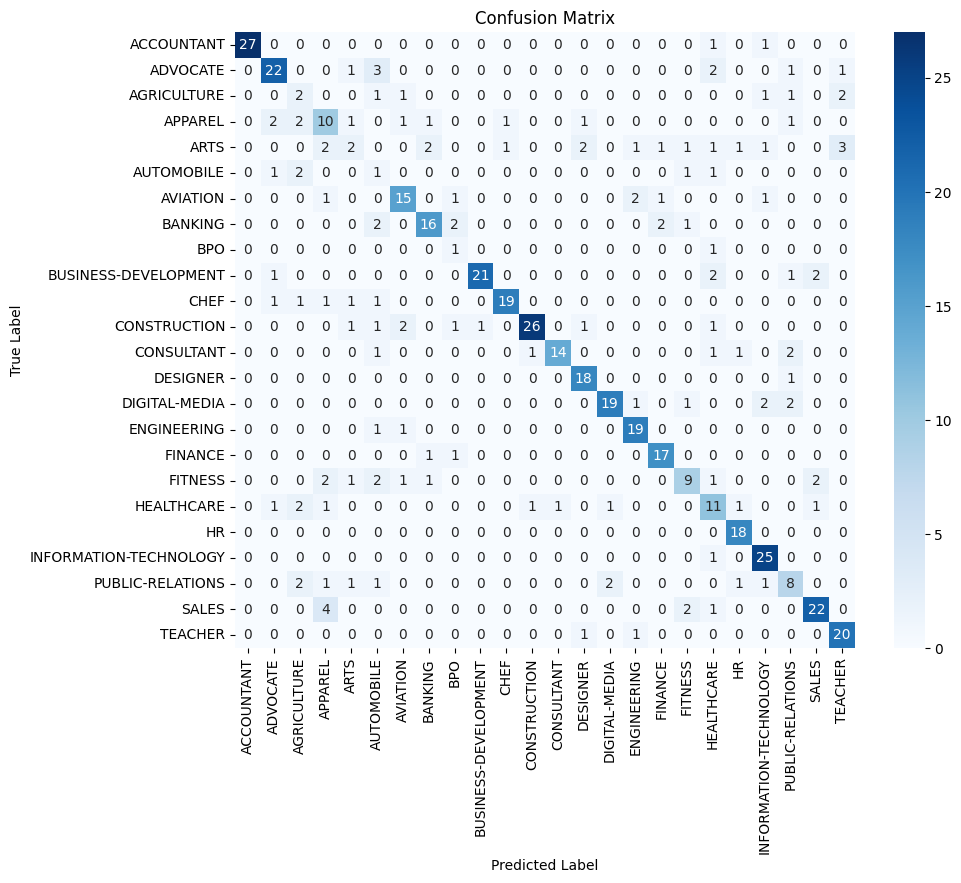

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with the best parameters
logistic_model = LogisticRegression(
    C=0.01, 
    class_weight='balanced', 
    penalty='l2', 
    solver='saga', 
    max_iter=1000
)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Generate and print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()






Fourth Visualization Above: **Confusion Matrix**